In [1]:
import random
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
from tqdm import tqdm
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.translate.meteor_score import meteor_score
from nltk.tokenize import word_tokenize
import nltk
from rouge_score import rouge_scorer

In [2]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/minhth/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/minhth/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Set paths
clevr_dir = '../datasets/CLEVR/CLEVR_v1.0'
clevrx_dir = '../datasets/CLEVR-X'
image_dir = os.path.join(clevr_dir, 'images')
questions_dir = os.path.join(clevr_dir, 'questions')
explanation_dir = os.path.join(clevrx_dir)
NUM_TRAIN_IMAGES = len(os.listdir(image_dir + '/train'))
val_image_dir = os.path.join(image_dir, 'val')

NUM_VAL_IMAGES = len(os.listdir(val_image_dir))

In [4]:
def load_json(file_path):
    try:
        with open(file_path) as f:
            return json.load(f)
    except (IOError, json.JSONDecodeError) as e:
        print(f"Error loading {file_path}: {e}")
        return None

In [5]:
# Load CLEVR-X explanations
explain_data = load_json(os.path.join(explanation_dir, 'CLEVR_val_explanations_v0.7.10.json'))
if explain_data is None:
    exit(1)

In [8]:
# Extract explanations and answers
explanations = [item['factual_explanation'] for item in explain_data['questions']]
answers = [item['answer'] for item in explain_data['questions']]
questions = [item['question'] for item in explain_data['questions']]
image_indices = [item['image_index'] for item in explain_data['questions']]

def visualize_text_qa_pairs(questions: list, answers: list, explanations: list, image_index):
    image_path = os.path.join(val_image_dir, f'CLEVR_val_{str(image_index).zfill(6)}.png')
    img = Image.open(image_path).convert('RGB')
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    print(f"Question: {questions[image_index]}")
    print(f"Answer: {answers[image_index]}")
    for j, explanation in enumerate(explanations[image_index]):
        print(f"Explanation {j+1}: {explanation}")
    print("\n")


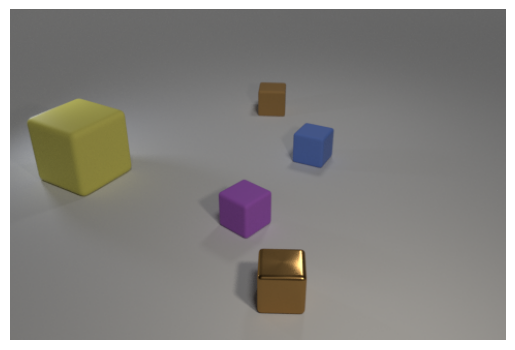

Question: What number of large things are either green metal balls or green metallic blocks?
Answer: 1
Explanation 1: There is a large block.
Explanation 2: There is a large cube.




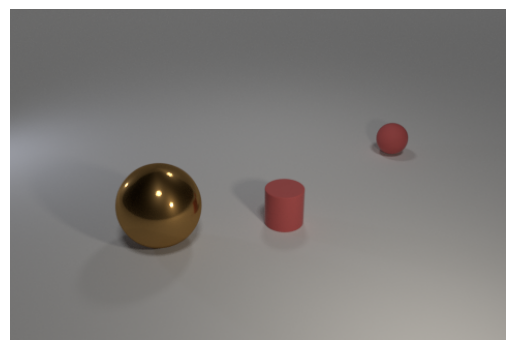

Question: What number of large blocks are in front of the matte thing right of the rubber ball in front of the big yellow matte sphere?
Answer: 0
Explanation 1: There are no large blocks that are in front of the matte cube that is right of the rubber ball that is in front of the big yellow matte sphere.
Explanation 2: There are no large blocks which are in front of the matte cube that is right of the rubber ball that is in front of the big yellow matte sphere.




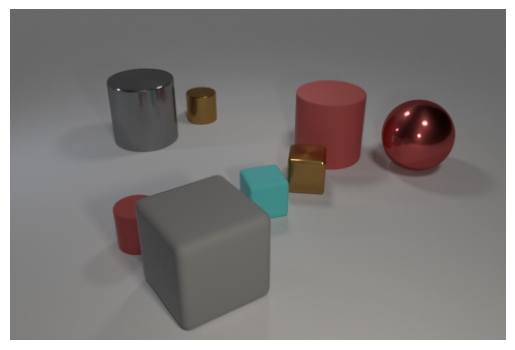

Question: Are the small object left of the tiny yellow metal cylinder and the small yellow cylinder made of the same material?
Answer: yes
Explanation 1: There is a small metallic sphere that is left of the tiny yellow metal cylinder and there is a small yellow metallic cylinder.
Explanation 2: There is a small metal ball which is on the left side of the tiny yellow metal cylinder and there is a small yellow metallic cylinder.
Explanation 3: The small ball to the left of a tiny yellow metal cylinder is metallic and the small yellow cylinder is metallic.
Explanation 4: There is a small shiny ball which is on the left side of the tiny yellow metal cylinder and there is a small yellow metallic cylinder.
Explanation 5: The small sphere to the left of the tiny yellow metal cylinder is shiny and the small yellow cylinder is metal.
Explanation 6: The small ball to the left of the tiny yellow metal cylinder is metallic and the small yellow cylinder is metal.
Explanation 7: The small sphere lef

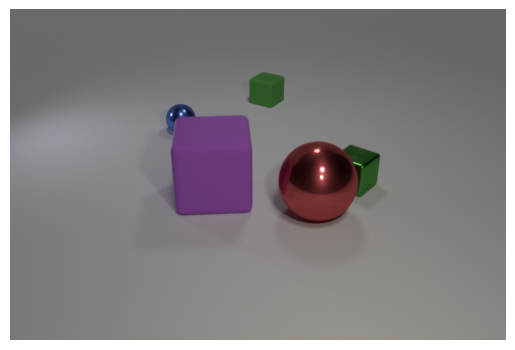

Question: How many other things have the same size as the red shiny object?
Answer: 3
Explanation 1: There are two large cubes and a large cylinder which have the identical size as a red shiny block.
Explanation 2: There are two large cubes and a large cylinder that have the same size as a red shiny cube.
Explanation 3: Two large cubes and a large cylinder have the same size as a red shiny cube.
Explanation 4: Two large cubes and a large cylinder have the same size as a red shiny block.




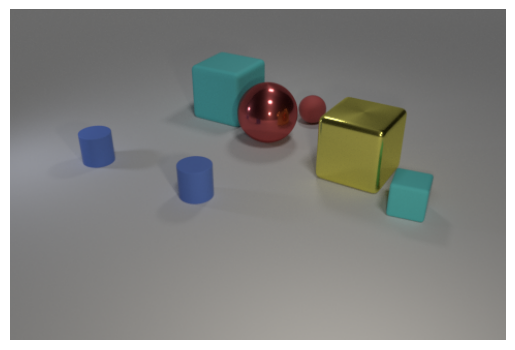

Question: How many rubber things are brown cubes or big cyan things?
Answer: 1
Explanation 1: There is a rubber cube.
Explanation 2: There is a rubber block.




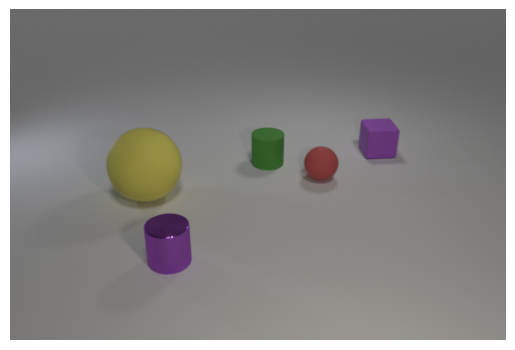

Question: Are there an equal number of blue things that are behind the small yellow thing and small yellow spheres?
Answer: yes
Explanation 1: There is a blue ball which is behind the small yellow sphere and there is a small yellow sphere.
Explanation 2: There is a blue sphere that is behind the small yellow sphere and there is a small yellow sphere.




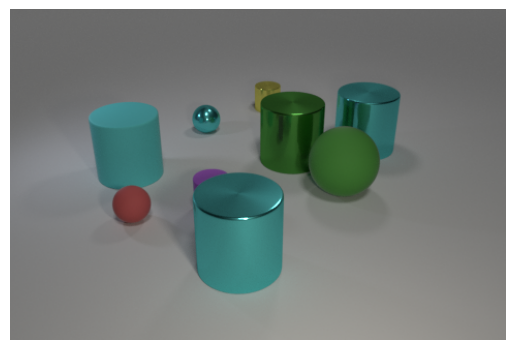

Question: What material is the thing that is the same color as the large rubber block?
Answer: metal
Explanation 1: There is a brown metal sphere that has the same color as a large rubber block.
Explanation 2: There is a brown metallic ball which has the identical color as a large rubber block.
Explanation 3: There is a brown shiny ball which has the identical color as a large rubber block.
Explanation 4: There is a brown metal ball which has the identical color as a large rubber block.
Explanation 5: There is a brown metallic sphere that has the same color as a large rubber block.




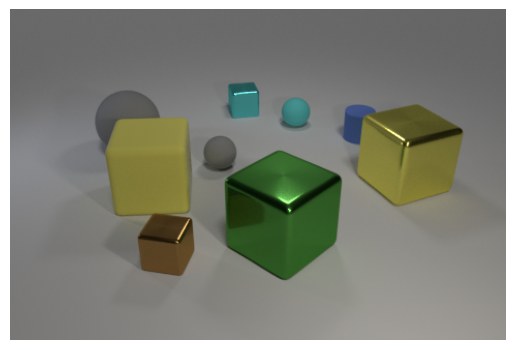

Question: Does the cyan matte thing that is on the left side of the gray cylinder have the same size as the brown ball?
Answer: no
Explanation 1: There is a tiny cyan matte ball which is on the left side of the gray cylinder and there is a large brown ball.
Explanation 2: The cyan matte sphere left of the gray cylinder is tiny and the brown ball is large.
Explanation 3: The cyan matte ball on the left side of the gray cylinder is tiny and the brown ball is big.
Explanation 4: The cyan matte ball on the left side of the gray cylinder is tiny and the brown ball is large.
Explanation 5: The cyan matte sphere left of the gray cylinder is small and the brown ball is large.
Explanation 6: The cyan matte ball to the left of a gray cylinder is small and the brown ball is big.
Explanation 7: There is a small cyan matte ball which is on the left side of the gray cylinder and there is a big brown ball.
Explanation 8: The cyan matte ball on the left side of a gray cylinder is small and the brown b

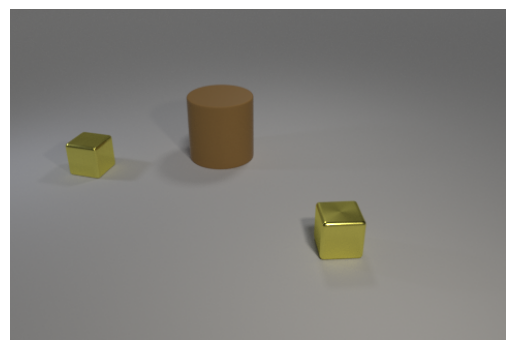

Question: Is there a big cylinder made of the same material as the blue object?
Answer: no
Explanation 1: There are no big cylinders which have the identical material as a blue block.
Explanation 2: There are no big cylinders that have the same material as a blue cube.
Explanation 3: No big cylinders have the same material as a blue block.
Explanation 4: No big cylinders have the same material as a blue cube.




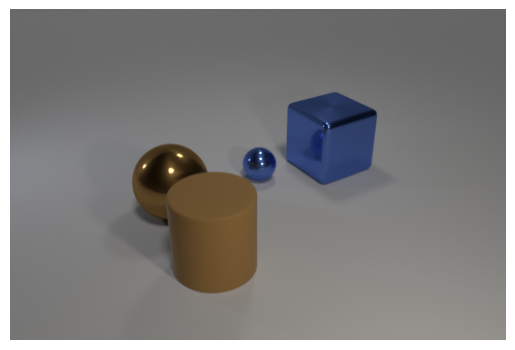

Question: There is a rubber ball behind the cyan object behind the cyan matte object to the right of the cyan cube; what is its size?
Answer: large
Explanation 1: There is a big rubber ball which is behind the cyan cube that is behind the cyan matte sphere that is right of the cyan cube.
Explanation 2: There is a large rubber ball that is behind the cyan cube that is behind the cyan matte sphere that is right of the cyan cube.




In [9]:
num_images = 10
indices = random.sample(range(NUM_VAL_IMAGES), num_images)
for i in indices:
    visualize_text_qa_pairs(questions, answers, explanations, i)

In [23]:
words = []
avg_length = 0
for explanation in explanations[:2]:
    print(explanation)
    for j in range(len(explanation)):
        print(word_tokenize(explanation[j]))
        print(len(word_tokenize(explanation[j])))
        avg_length += len(word_tokenize(explanation[j]))
    avg_length /= len(explanation)
    print(f"average length of the this list of explanations: {int(avg_length)}")
    print("\n")

['No things have the same shape as a big metallic sphere.', 'There are no things which have the identical shape as a big metallic ball.', 'There are no things that have the same shape as a big metallic sphere.', 'No things have the same shape as a big metallic ball.']
['No', 'things', 'have', 'the', 'same', 'shape', 'as', 'a', 'big', 'metallic', 'sphere', '.']
12
['There', 'are', 'no', 'things', 'which', 'have', 'the', 'identical', 'shape', 'as', 'a', 'big', 'metallic', 'ball', '.']
15
['There', 'are', 'no', 'things', 'that', 'have', 'the', 'same', 'shape', 'as', 'a', 'big', 'metallic', 'sphere', '.']
15
['No', 'things', 'have', 'the', 'same', 'shape', 'as', 'a', 'big', 'metallic', 'ball', '.']
12
average length of the this list of explanations: 13


['There is a big brown cylinder which has the identical shape as a green cylinder.', 'There is the big brown cylinder which has the identical shape as a green cylinder.', 'The big brown cylinder has the same shape as a green cylinder.', 'T

In [17]:
avg_length = 0
for explanation_list in explanations[:2]:
    print(explanation_list)
    for explanation in explanation_list:
        print(len(word_tokenize(explanation)))
        avg_length = int(np.mean([len(word_tokenize(explanation))]))
    print(f"average length of this explanation list: {avg_length}")

['No things have the same shape as a big metallic sphere.', 'There are no things which have the identical shape as a big metallic ball.', 'There are no things that have the same shape as a big metallic sphere.', 'No things have the same shape as a big metallic ball.']
12
15
15
12
average length of this explanation list: 12
['There is a big brown cylinder which has the identical shape as a green cylinder.', 'There is the big brown cylinder which has the identical shape as a green cylinder.', 'The big brown cylinder has the same shape as a green cylinder.', 'There is a big brown cylinder that has the same shape as a green cylinder.', 'There is the big brown cylinder that has the same shape as a green cylinder.']
16
16
13
16
16
average length of this explanation list: 16


In [11]:
# Build vocabulary from val answers and val explanations
def build_vocab(answers: list[str], explanations: list[str]):
    vocab = Counter()
    for answer in tqdm(answers, desc="Processing answers"):
        vocab.update(word_tokenize(answer.lower()))
    for explanation_list in tqdm(explanations, desc="Processing explanations"):
        for explanation in explanation_list:
            vocab.update(word_tokenize(explanation.lower()))
    return list(vocab.keys())

In [13]:
vocab = build_vocab(answers, explanations)
len(vocab)

Processing explanations: 100%|██████████████████████████████| 149984/149984 [00:50<00:00, 2996.74it/s]


78

In [20]:
type(explanations)

list

In [77]:
def calculate_avg_length(explanation_list: list[str]):
    """
    This function is used to calculate the average length of a list of explanations corresponding to its question
    """
    average_length = 0
    for explanation in explanation_list:
        average_length = int(np.mean([len(word_tokenize(explanation))]))
    return average_length

In [78]:
explanation_list = explanations[0]
print(explanation_list)
calculate_avg_length(explanation_list)

['No things have the same shape as a big metallic sphere.', 'There are no things which have the identical shape as a big metallic ball.', 'There are no things that have the same shape as a big metallic sphere.', 'No things have the same shape as a big metallic ball.']


12

In [79]:
# generate random word explanation
def generate_random_explanation(vocab, length):
    return ' '.join(random.sample(vocab, k=min(length, len(vocab))))

In [81]:
# generate random explanation corresponding to the first question
avg_length = calculate_avg_length(explanations[0])
sample_random_explanation = generate_random_explanation(vocab=vocab, length=avg_length)
print(f"Question: {questions[0]}")
print(f"Answers: {answers[0]}")
for i, explanation in enumerate(explanations[0]):
    print(f"Explanation {i}: {explanation}")
print(f"Random explanation: {sample_random_explanation}")

Question: Are there any other things that are the same shape as the big metallic object?
Answers: no
Explanation 0: No things have the same shape as a big metallic sphere.
Explanation 1: There are no things which have the identical shape as a big metallic ball.
Explanation 2: There are no things that have the same shape as a big metallic sphere.
Explanation 3: No things have the same shape as a big metallic ball.
Random explanation: 3 eight five on right color six two 9 in three shiny


In [120]:
def evaluate_single_explanation(ground_truth: str, random_explanation: str):
    """
    Evaluate a single pair of ground truth and random explanation with BLEU and ROUGE-L scores and accuracy.

    Args:
        ground_truth (str): The ground truth explanation.
        random_explanation (str): The randomly generated explanation.

    Returns:
        dict: A dictionary containing BLEU, ROUGE-L scores, and accuracy.
    """
    smoothing_function = SmoothingFunction().method1
    rouge_scorer_instance = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
    
    gt_tokens = word_tokenize(ground_truth)
    pred_tokens = word_tokenize(random_explanation)

    # Normalize strings
    gt_str = ' '.join(gt_tokens)
    pred_str = ' '.join(pred_tokens)

    # Calculate BLEU score
    bleu_score = sentence_bleu([gt_tokens], pred_tokens, smoothing_function=smoothing_function)
    
    # Calculate ROUGE-L score
    rouge_scores = rouge_scorer_instance.score(gt_str, pred_str)['rougeL']
    rouge_l_score = rouge_scores.fmeasure
    
    # Calculate accuracy
    accuracy = 1 if gt_str.lower().strip() == pred_str.lower().strip() else 0

    return {
        "bleu": bleu_score,
        "rouge_l": rouge_l_score,
        "accuracy": accuracy
    }

In [130]:
def visualize_random_explanation(questions: list, answers: list, explanations: list, image_index: int):
    image_path = os.path.join(val_image_dir, f'CLEVR_val_{str(image_index).zfill(6)}.png')
    img = Image.open(image_path).convert('RGB')
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    print(f"Image index: {image_index}")
    print(f"Question: {questions[image_index]}")
    print(f"Answer: {answers[image_index]}")
    for j, explanation in enumerate(explanations[image_index]):
        print(f"Explanation {j+1}: {explanation}" + f" - length: {len(word_tokenize(explanation))}")
    avg_length = calculate_avg_length(explanations[image_index])
    print("Average length:", avg_length)
    random_explanation = generate_random_explanation(vocab=vocab, length=avg_length)
    print(f"Random explanation: {random_explanation}" + f" - length: {len(word_tokenize(random_explanation))}")
    result = evaluate_single_explanation(explanations[image_index][0], random_explanation)
    print(f"Result: {result}")
    print("\n")
    print("=" * 10)

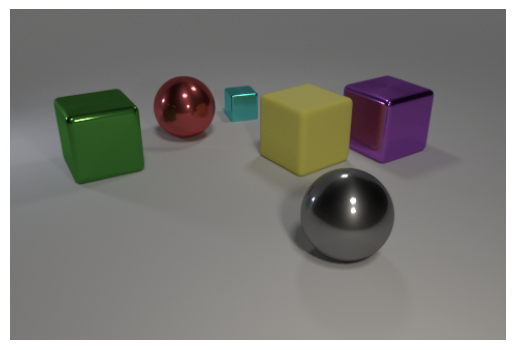

Image index: 5912
Question: Is the tiny block made of the same material as the blue cylinder?
Answer: no
Explanation 1: There is a tiny metal block and there is a blue rubber cylinder. - length: 14
Explanation 2: The tiny block is metallic and the blue cylinder is rubber. - length: 12
Explanation 3: There is a tiny metal block and there is a blue matte cylinder. - length: 14
Explanation 4: There is a tiny metallic block and there is a blue rubber cylinder. - length: 14
Explanation 5: There is a tiny shiny block and there is a blue rubber cylinder. - length: 14
Explanation 6: The tiny block is metal and the blue cylinder is matte. - length: 12
Explanation 7: The tiny block is shiny and the blue cylinder is rubber. - length: 12
Explanation 8: The tiny block is metallic and the blue cylinder is matte. - length: 12
Explanation 9: There is a tiny shiny block and there is a blue matte cylinder. - length: 14
Average length: 14
Random explanation: a cyan 4 have gray , five 0 color is shiny blo

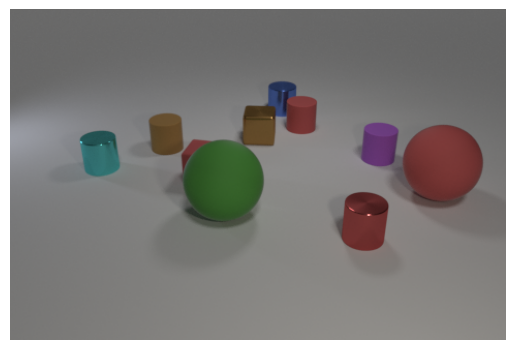

Image index: 1224
Question: How many small balls are the same color as the matte cube?
Answer: 1
Explanation 1: There is the small yellow ball which has the identical color as a matte cube. - length: 16
Explanation 2: The small yellow ball has the same color as a matte cube. - length: 13
Explanation 3: There is the small yellow ball that has the same color as a matte cube. - length: 16
Explanation 4: There is a small yellow ball which has the identical color as a matte cube. - length: 16
Average length: 16
Random explanation: block 5 large four on and thing red brown 6 1 a seven color big metal - length: 16
Result: {'bleu': 0.014628063653657535, 'rouge_l': 0.06451612903225808, 'accuracy': 0}




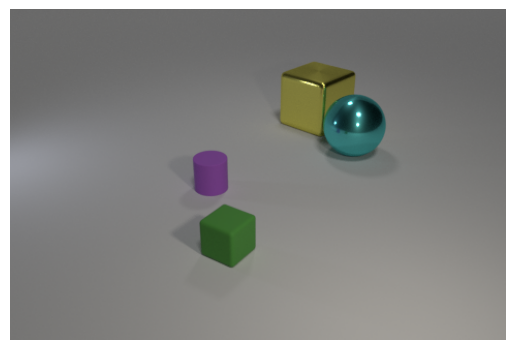

Image index: 1891
Question: There is a shiny thing in front of the matte cylinder that is left of the gray object; what size is it?
Answer: small
Explanation 1: There is a tiny shiny cylinder which is in front of the matte cylinder that is left of the gray cylinder. - length: 22
Explanation 2: There is a small shiny cylinder that is in front of the matte cylinder that is left of the gray cylinder. - length: 22
Average length: 22
Random explanation: blue front there cylinders no seven shape large as tiny color sphere side have 10 size the of green gray behind on - length: 22
Result: {'bleu': 0.012990806323574158, 'rouge_l': 0.23255813953488372, 'accuracy': 0}




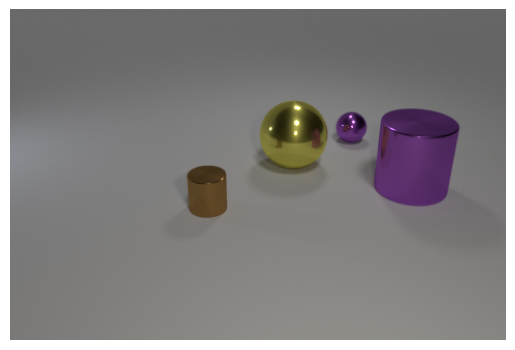

Image index: 8493
Question: Is there any other thing that is the same color as the rubber sphere?
Answer: yes
Explanation 1: There is the gray cylinder that has the same color as a rubber sphere. - length: 15
Explanation 2: There is a gray cylinder which has the identical color as a rubber sphere. - length: 15
Explanation 3: The gray cylinder has the same color as a rubber sphere. - length: 12
Explanation 4: There is the gray cylinder which has the identical color as a rubber sphere. - length: 15
Average length: 15
Random explanation: thing 2 six things block to there blocks no as ball purple gray 7 . - length: 15
Result: {'bleu': 0.017395797375642234, 'rouge_l': 0.14285714285714285, 'accuracy': 0}




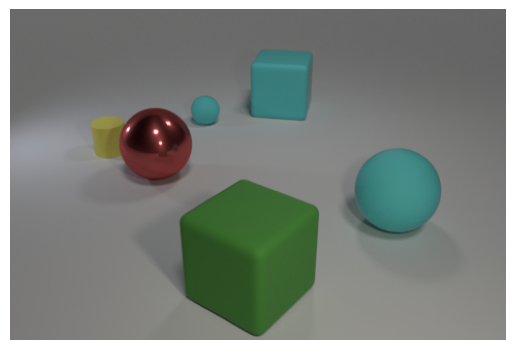

Image index: 3531
Question: How many large things are either metallic things or red balls?
Answer: 3
Explanation 1: There are a large gray metallic sphere, cube and cylinder. - length: 12
Average length: 12
Random explanation: rubber block color cyan blocks shiny right behind four cube material shape - length: 12
Result: {'bleu': 0.017033186037639283, 'rouge_l': 0.0909090909090909, 'accuracy': 0}




In [131]:
num_images = 5
indices = random.sample(range(NUM_VAL_IMAGES), num_images)
for i in indices:
    visualize_random_explanation(questions, answers, explanations, i)

In [91]:
def evaluate_random_explanations(ground_truths: list[str], generated_random_explanations: list[str]):
    """
    Evaluate random explanations with accuracy, BLEU, and ROUGE-L scores.

    Args:
        ground_truths (list[str]): A list of ground truth explanations.
        generated_random_explanations (list[str]): A list of generated explanations to evaluate.

    Returns:
        dict: A dictionary containing accuracy, BLEU, and ROUGE-L scores.
    """
    bleu_scores = []
    rouge_l_scores = []
    correct_predictions = 0
    total_predictions = len(ground_truths)
    smoothing_function = SmoothingFunction().method1
    
    rouge_scorer_instance = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)

    for gt, pred in tqdm(zip(ground_truths, generated_random_explanations), total=len(ground_truths), desc="Evaluating"):
        gt_tokens = word_tokenize(gt)
        pred_tokens = word_tokenize(pred)
        
        # Normalize string
        gt_str = ' '.join(gt_tokens)
        pred_str = ' '.join(pred_tokens)

        # BLEU score
        bleu_scores.append(sentence_bleu([gt_tokens], pred_tokens, smoothing_function=smoothing_function))
        
        # ROUGE-L score
        rouge_scores = rouge_scorer_instance.score(gt_str, pred_str)['rougeL']
        rouge_l_scores.append(rouge_scores.fmeasure)
                
        # Calculate accuracy
        if gt.lower().strip() == pred.lower().strip():
            correct_predictions += 1
    
    accuracy = correct_predictions / total_predictions

    return {
        "accuracy": accuracy,
        "correct_predictions": correct_predictions,
        "total_predictions": total_predictions,
        "bleu": np.mean(bleu_scores),
        "rouge_l": np.mean(rouge_l_scores),
    }

In [135]:
# take the first explanation for each question to be the ground-truth explanation
ground_truths = [explanation for explanation_list in explanations for explanation in explanation_list]
num_ground_truths = sum([len(explanation) for explanation in explanations])
generated_random_explanations = []
for explanation_list in tqdm(ground_truths):
    avg_length = calculate_avg_length(explanation_list)
    for explanation in explanation_list:
        random_explanation = generate_random_explanation(vocab=vocab, length=avg_length)
        generated_random_explanations.append(random_explanation)
    
print(len(generated_random_explanations))
print(len(ground_truths))


  1%|    | 4152/644151 [00:17<41:12, 258.80it/s]


  1%|    | 8387/644151 [00:34<42:27, 249.58it/s]


  2%|   | 12624/644151 [00:51<46:11, 227.85it/s]


  3%|   | 16815/644151 [01:08<41:34, 251.47it/s]


  3%|   | 20972/644151 [01:25<40:25, 256.95it/s]


  4%|   | 25216/644151 [01:43<44:36, 231.21it/s]


  5%|▏  | 29265/644151 [02:00<45:30, 225.16it/s]


  5%|▏  | 33383/644151 [02:17<41:12, 247.03it/s]


  6%|▏  | 37670/644151 [02:34<38:23, 263.26it/s]


  6%|▏  | 41839/644151 [02:52<42:20, 237.10it/s]


  7%|▏  | 45892/644151 [03:09<43:56, 226.95it/s]


  8%|▏  | 50020/644151 [03:26<38:43, 255.69it/s]


  8%|▎  | 54203/644151 [03:43<36:42, 267.87it/s]


  9%|▎  | 58389/644151 [04:00<43:08, 226.31it/s]


 10%|▎  | 62578/644151 [04:18<41:51, 231.57it/s]


 10%|▎  | 66848/644151 [04:35<37:19, 257.81it/s]


 11%|▎  | 71037/644151 [04:52<42:42, 223.66it/s]


 12%|▎  | 75079/644151 [05:09<41:20, 229.40it/s]


 12%|▎  | 79287/644151 [05:26<37:10, 253.24it/s]


 13%|▍  | 83493/644151 [05:44<36:09, 258.37it/s]


 14%|▍  | 87651/644151 [06:01<37:03, 250.24it/s]


 14%|▍  | 91842/644151 [06:18<39:47, 231.37it/s]


 15%|▍  | 95977/644151 [06:35<38:13, 239.02it/s]


 16%|▎ | 100145/644151 [06:53<40:49, 222.12it/s]


 16%|▎ | 104394/644151 [07:10<37:07, 242.35it/s]


 17%|▎ | 108424/644151 [07:27<38:34, 231.51it/s]


 17%|▎ | 112408/644151 [07:44<36:42, 241.42it/s]


 18%|▎ | 116402/644151 [08:02<39:04, 225.06it/s]


 19%|▎ | 120516/644151 [08:19<36:50, 236.93it/s]


 19%|▍ | 124708/644151 [08:36<32:08, 269.39it/s]


 20%|▍ | 128777/644151 [08:53<32:42, 262.56it/s]


 21%|▍ | 132945/644151 [09:11<34:28, 247.10it/s]


 21%|▍ | 137009/644151 [09:28<42:19, 199.67it/s]


 22%|▍ | 141156/644151 [09:45<30:20, 276.29it/s]


 23%|▍ | 145351/644151 [10:03<34:52, 238.38it/s]


 23%|▍ | 149586/644151 [10:20<34:57, 235.84it/s]


 24%|▍ | 153776/644151 [10:37<34:10, 239.20it/s]


 25%|▍ | 157995/644151 [10:54<31:10, 259.92it/s]


 25%|▌ | 162093/644151 [11:12<33:26, 240.28it/s]


 26%|▌ | 166255/644151 [11:29<31:21, 254.03it/s]


 26%|▌ | 170369/644151 [11:46<30:26, 259.46it/s]


 27%|▌ | 174426/644151 [12:03<33:25, 234.22it/s]


 28%|▌ | 178574/644151 [12:21<36:25, 213.05it/s]


 28%|▌ | 182718/644151 [12:38<31:59, 240.41it/s]


 29%|▌ | 186717/644151 [12:55<32:47, 232.55it/s]


 30%|▌ | 190845/644151 [13:12<32:15, 234.21it/s]


 30%|▌ | 194974/644151 [13:30<33:11, 225.53it/s]


 31%|▌ | 199001/644151 [13:47<34:42, 213.75it/s]


 32%|▋ | 203151/644151 [14:04<31:08, 236.05it/s]


 32%|▋ | 207325/644151 [14:21<30:11, 241.16it/s]


 33%|▋ | 211507/644151 [14:38<29:51, 241.49it/s]


 33%|▋ | 215683/644151 [14:56<28:31, 250.42it/s]


 34%|▋ | 219915/644151 [15:13<31:04, 227.48it/s]


 35%|▋ | 224094/644151 [15:30<30:17, 231.14it/s]


 35%|▋ | 228272/644151 [15:47<28:57, 239.29it/s]


 36%|▋ | 232343/644151 [16:05<27:18, 251.38it/s]


 37%|▋ | 236643/644151 [16:22<27:57, 242.91it/s]


 37%|▋ | 240880/644151 [16:39<28:03, 239.58it/s]


 38%|▊ | 244959/644151 [16:56<26:13, 253.62it/s]


 39%|▊ | 249098/644151 [17:14<27:11, 242.21it/s]


 39%|▊ | 253282/644151 [17:31<25:46, 252.69it/s]


 40%|▊ | 257386/644151 [17:48<26:52, 239.92it/s]


 41%|▊ | 261488/644151 [18:05<27:09, 234.82it/s]


 41%|▊ | 265665/644151 [18:22<25:09, 250.76it/s]


 42%|▊ | 269761/644151 [18:39<26:28, 235.73it/s]


 42%|▊ | 273749/644151 [18:57<25:44, 239.86it/s]


 43%|▊ | 277891/644151 [19:14<25:11, 242.34it/s]


 44%|▉ | 282019/644151 [19:31<26:38, 226.56it/s]


 44%|▉ | 286312/644151 [19:49<24:06, 247.42it/s]


 45%|▉ | 290448/644151 [20:06<26:21, 223.63it/s]


 46%|▉ | 294662/644151 [20:23<26:17, 221.60it/s]


 46%|▉ | 298853/644151 [20:40<21:51, 263.33it/s]


 47%|▉ | 302985/644151 [20:57<23:46, 239.16it/s]


 48%|▉ | 307259/644151 [21:14<23:12, 241.91it/s]


 48%|▉ | 311364/644151 [21:32<24:10, 229.37it/s]


 49%|▉ | 315549/644151 [21:49<25:30, 214.70it/s]


 50%|▉ | 319746/644151 [22:06<20:21, 265.65it/s]


 50%|█ | 323892/644151 [22:23<22:48, 233.94it/s]


 51%|█ | 328046/644151 [22:41<19:26, 270.87it/s]


 52%|█ | 332249/644151 [22:58<22:48, 227.95it/s]


 52%|█ | 336364/644151 [23:15<20:45, 247.14it/s]


 53%|█ | 340522/644151 [23:32<20:18, 249.09it/s]


 54%|█ | 344702/644151 [23:50<19:12, 259.80it/s]


 54%|█ | 348961/644151 [24:07<20:52, 235.67it/s]


 55%|█ | 353201/644151 [24:24<18:24, 263.47it/s]


 55%|█ | 357359/644151 [24:41<21:16, 224.59it/s]


 56%|█ | 361539/644151 [24:59<19:50, 237.29it/s]


 57%|█▏| 365736/644151 [25:16<16:40, 278.24it/s]


 57%|█▏| 370052/644151 [25:33<18:47, 243.17it/s]


 58%|█▏| 374246/644151 [25:50<18:42, 240.39it/s]


 59%|█▏| 378429/644151 [26:07<18:24, 240.65it/s]


 59%|█▏| 382598/644151 [26:24<17:30, 248.88it/s]


 60%|█▏| 386720/644151 [26:42<18:35, 230.79it/s]


 61%|█▏| 390857/644151 [26:59<18:28, 228.58it/s]


 61%|█▏| 395058/644151 [27:16<18:00, 230.50it/s]


 62%|█▏| 399280/644151 [27:33<16:39, 245.10it/s]


 63%|█▎| 403506/644151 [27:51<17:45, 225.76it/s]


 63%|█▎| 407762/644151 [28:08<14:53, 264.69it/s]


 64%|█▎| 411919/644151 [28:25<16:47, 230.53it/s]


 65%|█▎| 416059/644151 [28:42<16:34, 229.45it/s]


 65%|█▎| 420213/644151 [28:59<13:41, 272.43it/s]


 66%|█▎| 424396/644151 [29:17<14:46, 247.96it/s]


 67%|█▎| 428630/644151 [29:34<14:10, 253.38it/s]


 67%|█▎| 432845/644151 [29:51<13:27, 261.80it/s]


 68%|█▎| 437029/644151 [30:08<13:12, 261.39it/s]


 68%|█▎| 441184/644151 [30:26<13:42, 246.84it/s]


 69%|█▍| 445421/644151 [30:43<14:10, 233.53it/s]


 70%|█▍| 449637/644151 [31:00<12:08, 266.95it/s]


 70%|█▍| 453793/644151 [31:17<13:55, 227.82it/s]


 71%|█▍| 458063/644151 [31:34<12:46, 242.83it/s]


 72%|█▍| 462278/644151 [31:52<12:34, 241.12it/s]


 72%|█▍| 466405/644151 [32:09<13:09, 225.20it/s]


 73%|█▍| 470619/644151 [32:26<12:16, 235.57it/s]


 74%|█▍| 474812/644151 [32:43<11:37, 242.81it/s]


 74%|█▍| 478859/644151 [33:00<10:15, 268.65it/s]


 75%|█▍| 483006/644151 [33:17<10:22, 258.74it/s]


 76%|█▌| 487189/644151 [33:34<10:01, 261.16it/s]


 76%|█▌| 491384/644151 [33:51<10:25, 244.38it/s]


 77%|█▌| 495488/644151 [34:08<09:56, 249.32it/s]


 78%|█▌| 499668/644151 [34:25<09:05, 265.04it/s]


 78%|█▌| 503827/644151 [34:43<09:36, 243.30it/s]


 79%|█▌| 508008/644151 [35:00<09:27, 240.09it/s]


 80%|█▌| 512186/644151 [35:17<09:25, 233.21it/s]


 80%|█▌| 516348/644151 [35:34<09:20, 228.07it/s]


 81%|█▌| 520491/644151 [35:52<08:59, 229.09it/s]


 81%|█▋| 524756/644151 [36:09<09:29, 209.51it/s]


 82%|█▋| 529035/644151 [36:26<07:41, 249.56it/s]


 83%|█▋| 533190/644151 [36:43<08:08, 226.99it/s]


 83%|█▋| 537365/644151 [37:00<07:54, 225.27it/s]


 84%|█▋| 541490/644151 [37:17<06:50, 250.26it/s]


 85%|█▋| 545721/644151 [37:34<06:45, 242.93it/s]


 85%|█▋| 549809/644151 [37:52<07:01, 223.76it/s]


 86%|█▋| 553983/644151 [38:09<06:45, 222.40it/s]


 87%|█▋| 558144/644151 [38:26<05:51, 244.41it/s]


 87%|█▋| 562302/644151 [38:44<04:42, 289.42it/s]


 88%|█▊| 566463/644151 [39:01<05:10, 250.29it/s]


 89%|█▊| 570644/644151 [39:18<04:44, 258.59it/s]


 89%|█▊| 574870/644151 [39:35<04:32, 254.05it/s]


 90%|█▊| 579134/644151 [39:53<04:34, 237.00it/s]


 91%|█▊| 583339/644151 [40:10<04:08, 244.87it/s]


 91%|█▊| 587598/644151 [40:27<03:53, 242.44it/s]


 92%|█▊| 591692/644151 [40:44<03:35, 243.48it/s]


 92%|█▊| 595774/644151 [41:02<03:47, 213.06it/s]


 93%|█▊| 600026/644151 [41:19<02:58, 246.84it/s]


 94%|█▉| 604185/644151 [41:36<02:36, 254.83it/s]


 94%|█▉| 608307/644151 [41:53<02:10, 273.78it/s]


 95%|█▉| 612510/644151 [42:10<02:14, 236.10it/s]


 96%|█▉| 616776/644151 [42:28<01:46, 256.53it/s]


 96%|█▉| 621028/644151 [42:45<01:35, 242.98it/s]


 97%|█▉| 625233/644151 [43:02<01:14, 255.38it/s]


 98%|█▉| 629406/644151 [43:19<01:01, 238.61it/s]


 98%|█▉| 633554/644151 [43:36<00:46, 229.39it/s]


 99%|█▉| 637741/644151 [43:54<00:26, 245.91it/s]


100%|█▉| 641899/644151 [44:11<00:09, 230.81it/s]


100%|██| 644151/644151 [44:20<00:00, 242.12it/s]

59522393
644151


In [110]:
ground_truth = [explanation for explanation_list in explanations for explanation in explanation_list]
len(ground_truth)

644151

In [136]:
evaluation_scores = evaluate_random_explanations(ground_truth, generated_random_explanations)
print(evaluation_scores)


Evaluating:   3%|█▏                                 | 21380/644151 [00:08<04:03, 2555.36it/s]


Evaluating:   7%|██▎                                | 43074/644151 [00:17<03:58, 2525.45it/s]


Evaluating:  10%|███▌                               | 64543/644151 [00:25<03:54, 2467.95it/s]


Evaluating:  13%|████▋                              | 85914/644151 [00:34<03:46, 2461.03it/s]


Evaluating:  17%|█████▋                            | 107451/644151 [00:42<03:37, 2465.73it/s]


Evaluating:  20%|██████▊                           | 128951/644151 [00:51<03:25, 2501.91it/s]


Evaluating:  23%|███████▉                          | 150781/644151 [01:00<03:14, 2531.83it/s]


Evaluating:  27%|█████████                         | 172501/644151 [01:08<03:04, 2556.42it/s]


Evaluating:  30%|██████████▏                       | 194042/644151 [01:17<02:56, 2554.50it/s]


Evaluating:  33%|███████████▍                      | 215696/644151 [01:25<02:52, 2484.57it/s]


Evaluating:  37%|████████████▌                     | 237398/644151 [01:34<02:41, 2515.86it/s]


Evaluating:  40%|█████████████▋                    | 259140/644151 [01:42<02:29, 2571.03it/s]


Evaluating:  44%|██████████████▊                   | 280824/644151 [01:51<02:23, 2536.05it/s]


Evaluating:  47%|███████████████▉                  | 302656/644151 [02:00<02:12, 2571.40it/s]


Evaluating:  50%|█████████████████                 | 324418/644151 [02:08<02:06, 2521.88it/s]


Evaluating:  54%|██████████████████▎               | 346288/644151 [02:17<01:54, 2609.07it/s]


Evaluating:  57%|███████████████████▍              | 368193/644151 [02:25<01:47, 2571.01it/s]


Evaluating:  61%|████████████████████▌             | 389963/644151 [02:34<01:38, 2574.68it/s]


Evaluating:  64%|█████████████████████▋            | 411953/644151 [02:42<01:29, 2594.89it/s]


Evaluating:  67%|██████████████████████▉           | 433790/644151 [02:51<01:22, 2557.19it/s]


Evaluating:  71%|████████████████████████          | 455514/644151 [02:59<01:13, 2550.85it/s]


Evaluating:  74%|█████████████████████████▏        | 477169/644151 [03:08<01:06, 2494.21it/s]


Evaluating:  77%|██████████████████████████▎       | 499076/644151 [03:17<00:56, 2590.02it/s]


Evaluating:  81%|███████████████████████████▍      | 520878/644151 [03:25<00:48, 2516.36it/s]


Evaluating:  84%|████████████████████████████▋     | 542650/644151 [03:34<00:38, 2620.01it/s]


Evaluating:  88%|█████████████████████████████▊    | 564073/644151 [03:42<00:31, 2542.50it/s]


Evaluating:  91%|██████████████████████████████▉   | 585930/644151 [03:51<00:22, 2611.29it/s]


Evaluating:  94%|████████████████████████████████  | 607724/644151 [03:59<00:14, 2501.91it/s]


Evaluating:  98%|█████████████████████████████████▏| 629713/644151 [04:08<00:05, 2551.75it/s]


Evaluating: 100%|██████████████████████████████████| 644151/644151 [04:14<00:00, 2535.99it/s]


{'accuracy': 0.0, 'correct_predictions': 0, 'total_predictions': 644151, 'bleu': 2.9649583192363596e-06, 'rouge_l': 0.022852542148764823}


In [133]:
generated_random_explanations

['brown front and material 4 as 9 8 things , rubber that',
 'six block thing ball color yellow 2 0 is cyan side behind',
 'matte sphere cylinder big size cubes things on of color to small',
 'is left . that front large size metal 2 things brown the',
 '6 and is rubber same matte behind has color red size things 9 balls which sphere',
 'material is color purple three block have left of two , 8 4 the seven identical',
 'big things size 10 on four same 7 six yellow tiny color there which metallic side',
 'shiny 0 and 2 4 as no are side two spheres six 7 cyan thing blocks',
 'eight tiny cyan 5 red 6 a material have are thing yellow two object behind cylinders',
 '5 sphere has 4 shiny cyan have',
 '3 purple brown a cylinders size the',
 'yes cylinder . yellow blocks 1 two',
 '8 4 has cylinders things metallic material',
 'the 4 5 cylinder 2 blue green',
 '0 large gray the is spheres on',
 '0 seven 1 , block cube large',
 'six five cube metal 5 front 1 4 cylinder block object color seven lar